In [36]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [37]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [38]:
from bitarray import bitarray

In [39]:
# @profile
def read_grid(filename):
    grid = []
    with open(filename) as f:
        w, h = map(int, f.readline().split(maxsplit=1))
        
        for y in range(h+2):
            grid.append([0]*(w+2))
        
        for no, line in enumerate(f):
            try:
                y, x = map(int, line.split(maxsplit=1))

                if y < 0 or x < 0:
                    raise ValueError

            except ValueError:
                raise Exception(f"Invalid cell on line {no + 2}.")

            grid[y+1][x+1] = 1

    return grid

Rules:
- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [40]:
# @profile
def tick(grid):
    h, w = len(grid)-2, len(grid[0])-2

    nextgrid = []
    for y in range(h+2):
        nextgrid.append([0]*(w+2))

    for y, row in enumerate(grid[1:-1]):
        for x, cell in enumerate(row[1:-1]):
            count = + grid[y][x]  + grid[y][x+1]  +grid[y][x+2]   + grid[y+1][x]   + grid[y+1][x+2]   + grid[y+2][x]  + grid[y+2][x+1]  + grid[y+2][x+2]
            nextgrid[y+1][x+1] = 1 if count == 3 or (cell and count == 2) else 0

    return nextgrid

In [41]:
filename = "data/input_5x5.txt"

In [42]:
%lprun -f read_grid read_grid(filename)
grid = read_grid(filename)

Timer unit: 1e-07 s

Total time: 0.0006242 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\3667211519.py
Function: read_grid at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def read_grid(filename):
     3         1         10.0     10.0      0.2      grid = []
     4         2       2793.0   1396.5     44.7      with open(filename) as f:
     5         1       2013.0   2013.0     32.2          w, h = map(int, f.readline().split(maxsplit=1))
     6                                                   
     7         8        139.0     17.4      2.2          for y in range(h+2):
     8         7        201.0     28.7      3.2              grid.append([0]*(w+2))
     9                                                   
    10         6        618.0    103.0      9.9          for no, line in enumerate(f):
    11         5         49.0      9.8      0.8              try:
    12         5        215.0     43.0 

In [43]:
grid

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [44]:
%lprun -f tick tick (grid)
nextgrid = tick(grid)

Timer unit: 1e-07 s

Total time: 0.0001955 s
File: C:\Users\jazib\AppData\Local\Temp\ipykernel_25772\3112161598.py
Function: tick at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def tick(grid):
     3         1        115.0    115.0      5.9      h, w = len(grid)-2, len(grid[0])-2
     4                                           
     5         1         21.0     21.0      1.1      nextgrid = []
     6         8        172.0     21.5      8.8      for y in range(h+2):
     7         7        214.0     30.6     10.9          nextgrid.append([0]*(w+2))
     8                                           
     9         6        107.0     17.8      5.5      for y, row in enumerate(grid[1:-1]):
    10        30        415.0     13.8     21.2          for x, cell in enumerate(row[1:-1]):
    11        25        465.0     18.6     23.8              count = + grid[y][x]  + grid[y][x+1]  +grid[y][x+2]   + grid[y+1][x]   + 

In [45]:
nextgrid

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [46]:
num_generations = 4

nextgrid = grid.copy()
for i in range(num_generations):
    nextgrid = tick(nextgrid)

nextgrid

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0]]

**Memory Profiler Results for the same code**


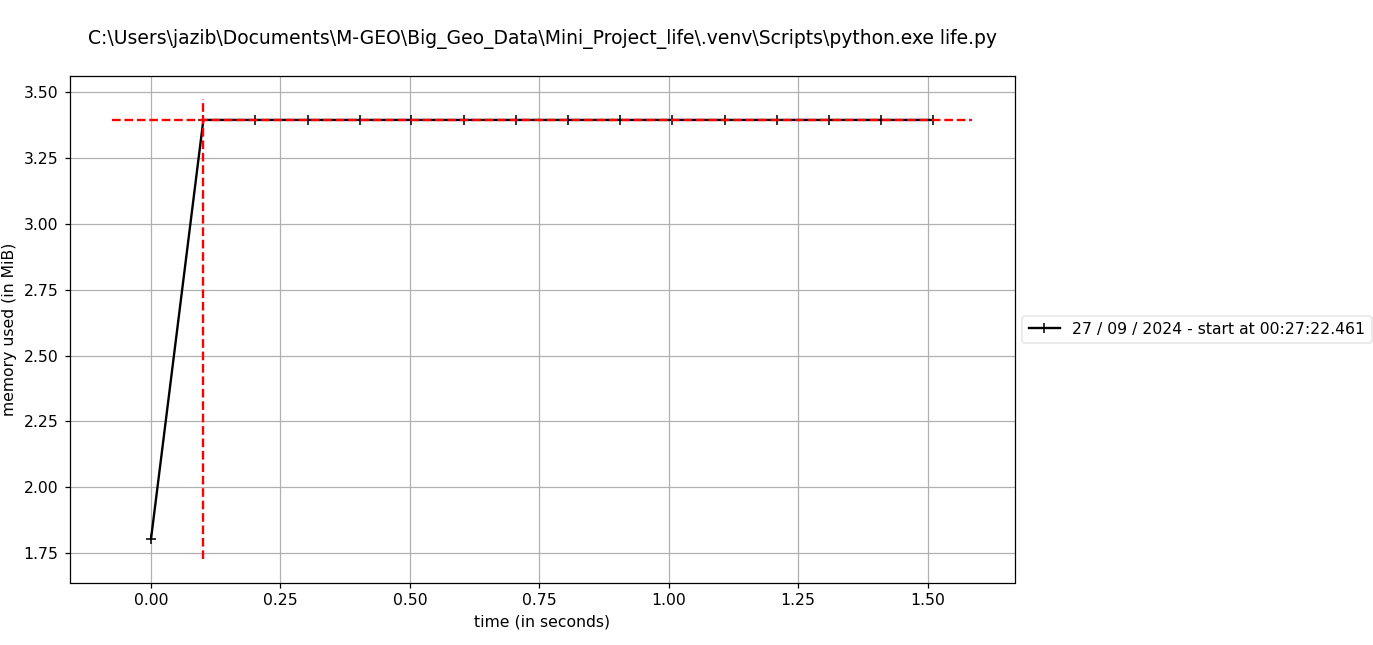